In [1]:
import os
import numpy as np
#For Image pre-Processing, processing and building model
from keras.models import Sequential
from keras.layers import Activation,Dropout,Flatten,Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.layers import Convolution2D,MaxPooling2D,ZeroPadding2D
from keras import optimizers
#for Plotting Model
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

Using TensorFlow backend.


In [2]:
img_width, img_height = 384,256
#rescaling pixel values from [0,255] to [0,1] interval
datagen = ImageDataGenerator(rescale = 1./255)
#retrieves images and their classes for test sets
validation_data_dir = 'data/test/new'
validation_generator = datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width,img_height),
    batch_size=32,
    class_mode='binary')

Found 24 images belonging to 2 classes.


# The following Cell Defines the Stucture of Convolutinal Network

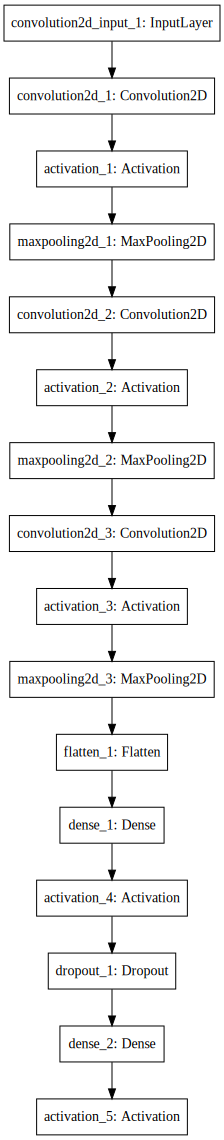

In [3]:
#This CellDefines the structure of the model
#Define Model Type followed by layers
model = Sequential()
model.add(Convolution2D(32,3,3,input_shape = (img_width,img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(32,3,3,input_shape = (img_width,img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(64,3,3,input_shape = (img_width,img_height,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

SVG(model_to_dot(model).create(prog='dot',format='svg'))

In [4]:
#compiles the model
model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [5]:
nb_validation_samples = 24

In [6]:
#Loads a pre-learned Model
model.load_weights('models/basic_cnn_15epochs_acc_1.h5')

In [7]:
model.evaluate_generator(validation_generator, nb_validation_samples)

[0.65644508600234985, 0.70833331346511841]